In [1]:
#Start by importing the necessary libraries:
import numpy as np
import tensorflow as tf
import pandas as pd
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# from tensorflow.keras import layers, models
# from sklearn.metrics import mean_squared_error

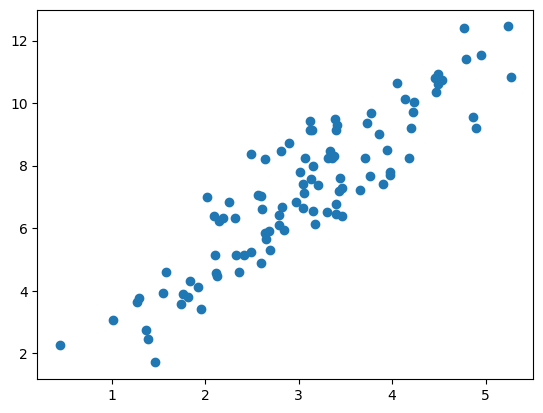

In [2]:
#Generate the data:
np.random.seed(0)
X = np.random.normal(3, 1, 100)#Mean 3 deviation 1 Samples 100
y = 2 * X + 1 + np.random.normal(0, 1, 100)
# df=pd.DataFrame(X)
# print(df.head())
plt.scatter(X, y)
plt.show()

In [3]:
#Splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, 1))
X_test = scaler.transform(X_test.reshape(-1, 1))

In [5]:
#Define the model architecture:
# Create a sequential model
# model = models.Sequential()

# Add a single Dense layer with one unit (output) and no activation function (linear)
# Reshape X to have a single feature
# X = X.reshape(-1, 1)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,), name="input_layer"),
    tf.keras.layers.Dense(units=1, activation=None, name="output_layer")
])

# Compile the model
model.compile(optimizer='sgd', loss='mse')  # sgd stands for Stochastic Gradient Descent

# Print a summary of the model
model.summary()
# model.compile(optimizer='adam', loss='mean_squared_error')




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


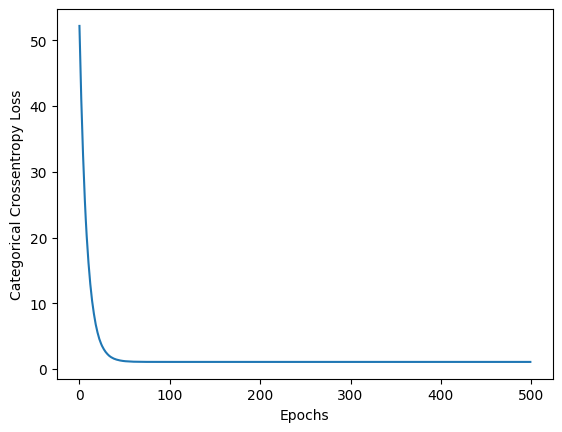

In [6]:
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), verbose=0)
# Plot the training history
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy Loss')
plt.show()

1/1 [==============================] - 0s 193ms/step


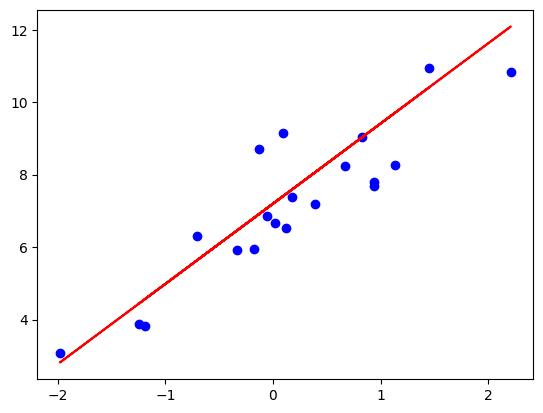

In [7]:
#Make predictions
y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.show()

In [37]:
# import matplotlib.pyplot as plt

# # Plot the loss over epochs
# plt.figure(figsize=(12, 6))
# plt.plot(history.history['loss'], 'bo', label='Training Loss')
# plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [8]:
train_loss = model.evaluate(X_train, y_train, verbose=0)#to predict the value and to find the mean square error between them
print(f'Training Loss: {train_loss}')

# Evaluate on testing data
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Testing Loss: {test_loss}')

Training Loss: 1.086635708808899
Testing Loss: 0.9839056134223938


In [39]:
# #Mean square error
# y_train_pred = model.predict(X_train)

# # Predictions on testing data
# y_test_pred = model.predict(X_test)

# # Calculate Mean Squared Error
# train_mse = mean_squared_error(y_train, y_train_pred)
# test_mse = mean_squared_error(y_test, y_test_pred)

# print(f'Training MSE: {train_mse}')
# print(f'Testing MSE: {test_mse}')

1/1 [==============================] - 0s 47ms/step
Training MSE: 1.0866024428166299
Testing MSE: 0.9791582000319299
